## 準備

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(),'data','temperature.csv'), encoding='shift-jis', skiprows=3)
df.columns = ['datetime', 'temp']
df['datetime'] = pd.to_datetime(df['datetime'])

print(df.shape)
print(df['datetime'].min(), '\n-->', df['datetime'].max())

(8784, 2)
2022-11-26 01:00:00 
--> 2023-11-27 00:00:00


mean: 17.36240892531876, std: 9.45575690557394


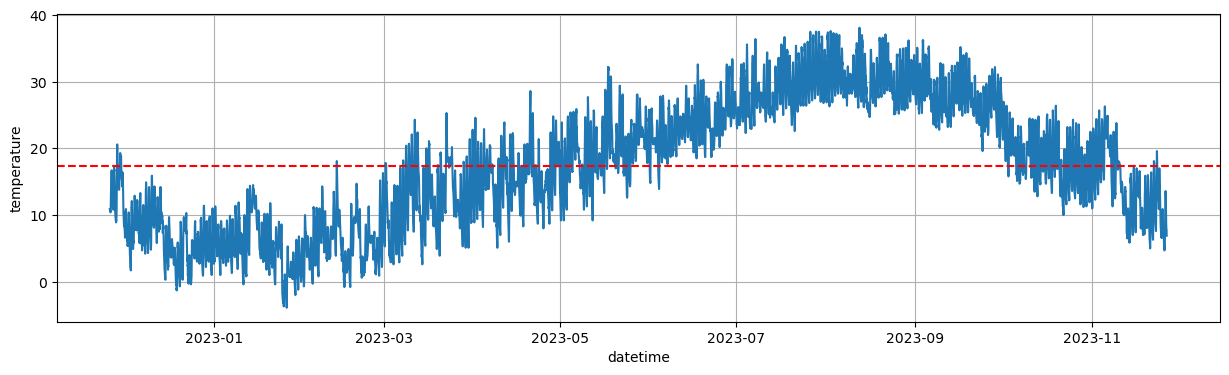

In [3]:
# 1時間ごと気温(生データ)
print(f'mean: {df.temp.mean()}, std: {df.temp.std()}')
plt.figure(figsize=(15,4))
plt.plot(df['datetime'], df['temp'])
plt.xlabel('datetime')
plt.ylabel('temperature')
plt.axhline(y=df.temp.mean(), color='red', linestyle='--')
plt.grid()
plt.show()

## 階差系列

mean: -0.00045542525333029736, std: 0.9717882345665979


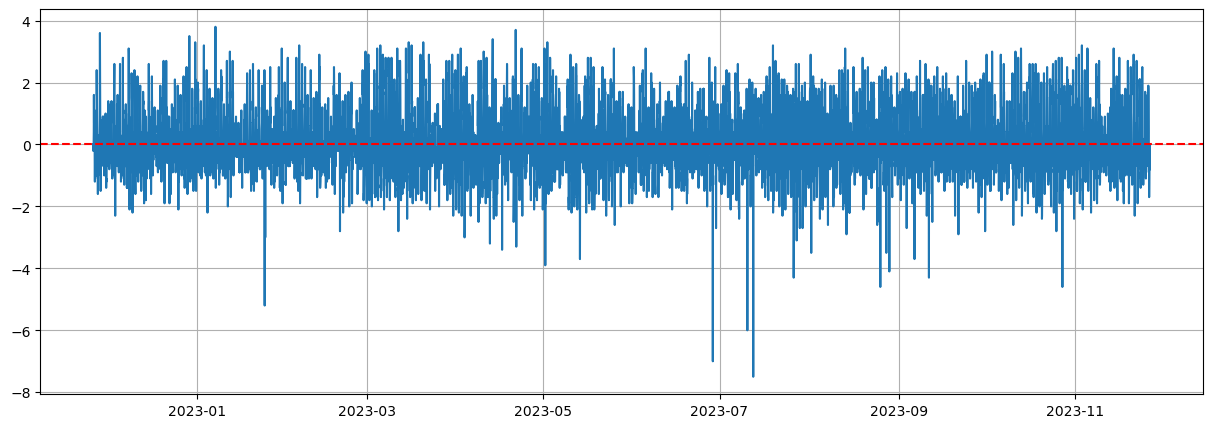

In [4]:
# 階差系列をプロット
df_diff = df['temp'].diff()
print(f'mean: {df_diff.mean()}, std: {df_diff.std()}')
plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df_diff)
plt.axhline(y=df_diff.mean(), color='red', linestyle='--')
plt.grid()
plt.show()

In [5]:
# 拡張ディッキー・フラー検定(Augmented Dickey-Fuller test)
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_diff.dropna())
print(f'ADF statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical values: {result[4]}')

ADF statistic: -20.69795056999495
p-value: 0.0
Critical values: {'1%': -3.431097226246283, '5%': -2.8618702243759544, '10%': -2.56694577346149}
